In [55]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/processed/all_shots_2000-2020.csv", index_col=0)
pd.set_option('display.max_columns', 500)
df.dropna(inplace=True)

df = pd.concat([df, pd.get_dummies(df['Shot Zone Range'], prefix='SZR')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Shot Zone Area'], prefix='SZA')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Shot Zone Basic'], prefix='SZB')], axis=1)


df.drop(['Shot Zone Basic','Shot Zone Area','Shot Zone Range','GAME_ID', 'EVENTNUM', 'year_start', 'year_end', 'Year','PLAYER1_TEAM_ABBREVIATION', 'Away Team', 'PLAYER1_NAME', 'Seconds Remaining', 'SG-PG','PERSON1TYPE', '3PT'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428892 entries, 0 to 481386
Data columns (total 50 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Shot Distance  428892 non-null  float64
 1   X Location     428892 non-null  float64
 2   Y Location     428892 non-null  float64
 3   Season Type    428892 non-null  float64
 4   target         428892 non-null  float64
 5   PERIOD         428892 non-null  int64  
 6   at_home        428892 non-null  float64
 7   jump_shot      428892 non-null  float64
 8   layup_shot     428892 non-null  float64
 9   dunk_shot      428892 non-null  float64
 10  hook_shot      428892 non-null  float64
 11  free_throw     428892 non-null  float64
 12  minutes_left   428892 non-null  int64  
 13  seconds_left   428892 non-null  int64  
 14  Age            428892 non-null  float64
 15  TS%            428892 non-null  float64
 16  PTM            428892 non-null  float64
 17  TRBM           428892 non-null  fl

In [56]:
df.head()

,Shot Distance,X Location,Y Location,Season Type,target,PERIOD,at_home,jump_shot,layup_shot,dunk_shot,hook_shot,free_throw,minutes_left,seconds_left,Age,TS%,PTM,TRBM,USG%,FG%,2P%,3P%,FT%,PTS,height,weight,C,PF,PG,PG-SG,SF,SG,SZR_0.0,SZR_1.0,SZR_2.0,SZR_3.0,SZR_4.0,SZA_0.0,SZA_1.0,SZA_2.0,SZA_3.0,SZA_4.0,SZA_5.0,SZB_0.0,SZB_1.0,SZB_2.0,SZB_3.0,SZB_4.0,SZB_5.0,SZB_6.0
0,19.0,-107.0,167.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,11,668,24.0,0.496,28.414286,3.814286,34.4,0.421,0.435,0.341,0.713,1989.0,182.88,165.0,0.0,0.0,0.0,0.0,0.0,1.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
1,21.0,-115.0,177.0,1.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,7,477,24.0,0.496,28.414286,3.814286,34.4,0.421,0.435,0.341,0.713,1989.0,182.88,165.0,0.0,0.0,0.0,0.0,0.0,1.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,16.0,165.0,13.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,7,443,24.0,0.496,28.414286,3.814286,34.4,0.421,0.435,0.341,0.713,1989.0,182.88,165.0,0.0,0.0,0.0,0.0,0.0,1.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
3,15.0,0.0,378.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,7,432,24.0,0.496,28.414286,3.814286,34.4,0.421,0.435,0.341,0.713,1989.0,182.88,165.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,15.0,0.0,378.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,7,432,24.0,0.496,28.414286,3.814286,34.4,0.421,0.435,0.341,0.713,1989.0,182.88,165.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


In [37]:
pd.crosstab(df['Shot Zone Area'], df['target'])

target,0.0,1.0
Shot Zone Area,,
0.0,604,21
1.0,100113,181871
2.0,21873,13875
3.0,23879,16625
4.0,21793,14025
5.0,20277,13936


In [38]:
pd.crosstab(df['Shot Zone Range'], df['target'])

target,0.0,1.0
Shot Zone Range,,
0.0,40273,28877
1.0,37055,21201
2.0,61719,120199
3.0,604,21
4.0,48888,70055


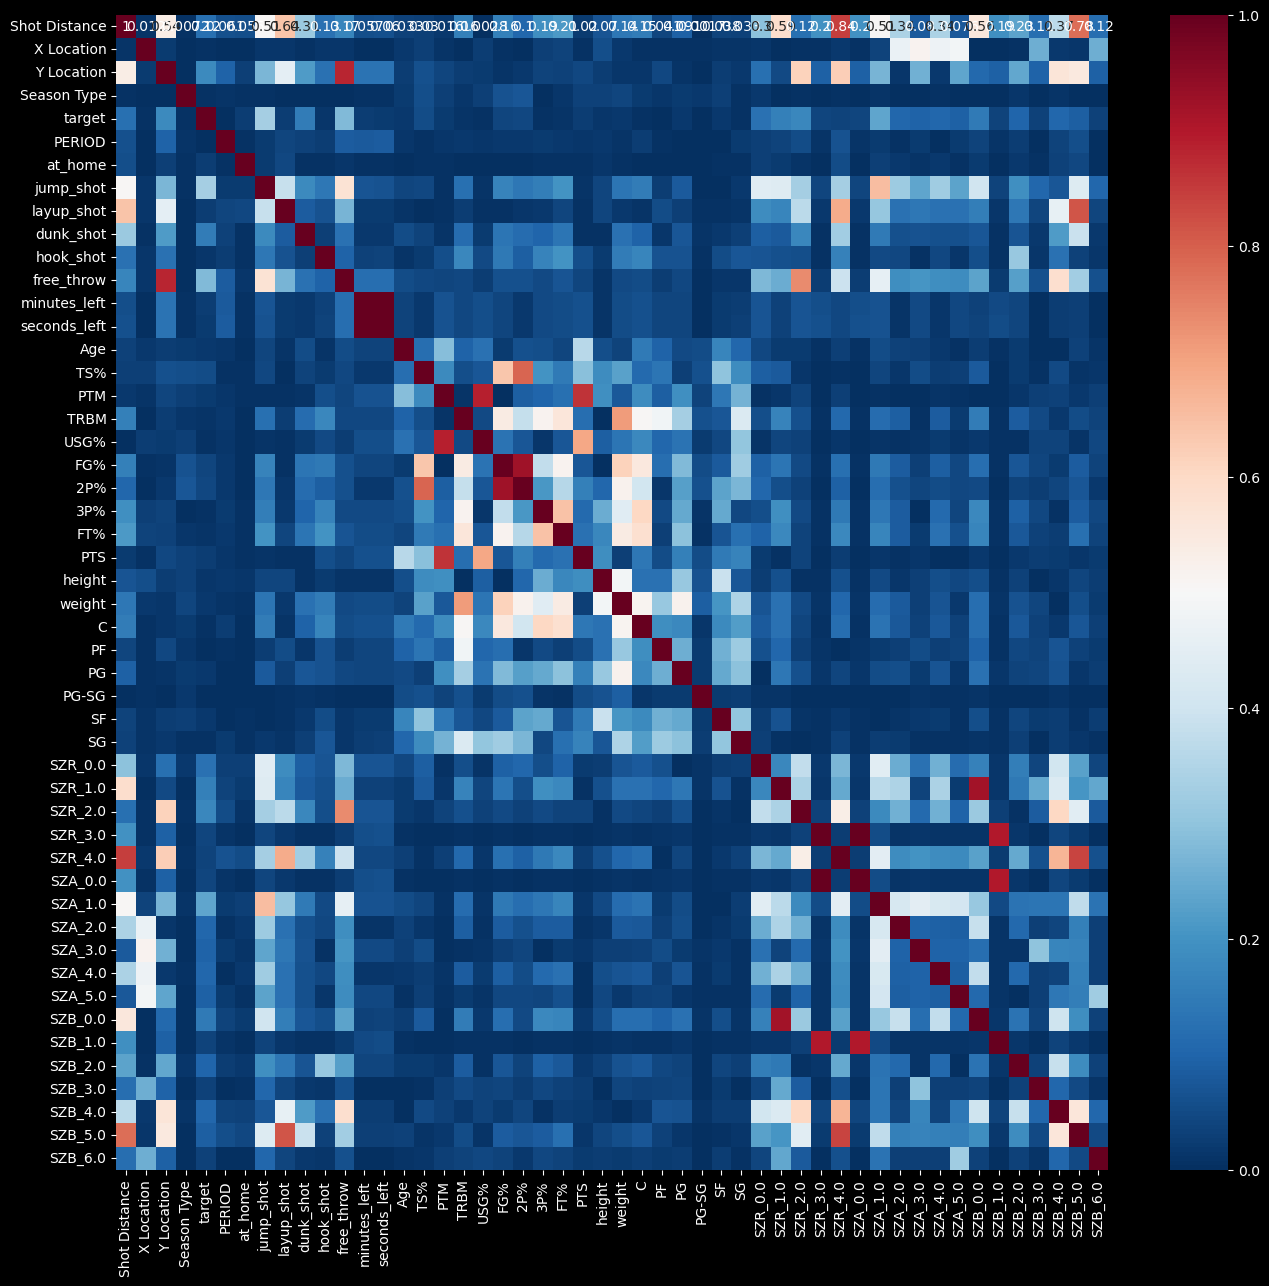

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 15))

sns.heatmap(df.corr().abs(), annot=True, cmap='RdBu_r', vmax=1, vmin=0);

In [59]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [60]:
# prepare data for modeling
df = pd.get_dummies(df)

#   
X = df.drop('target', axis = 1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_scaled['target'] = y_train

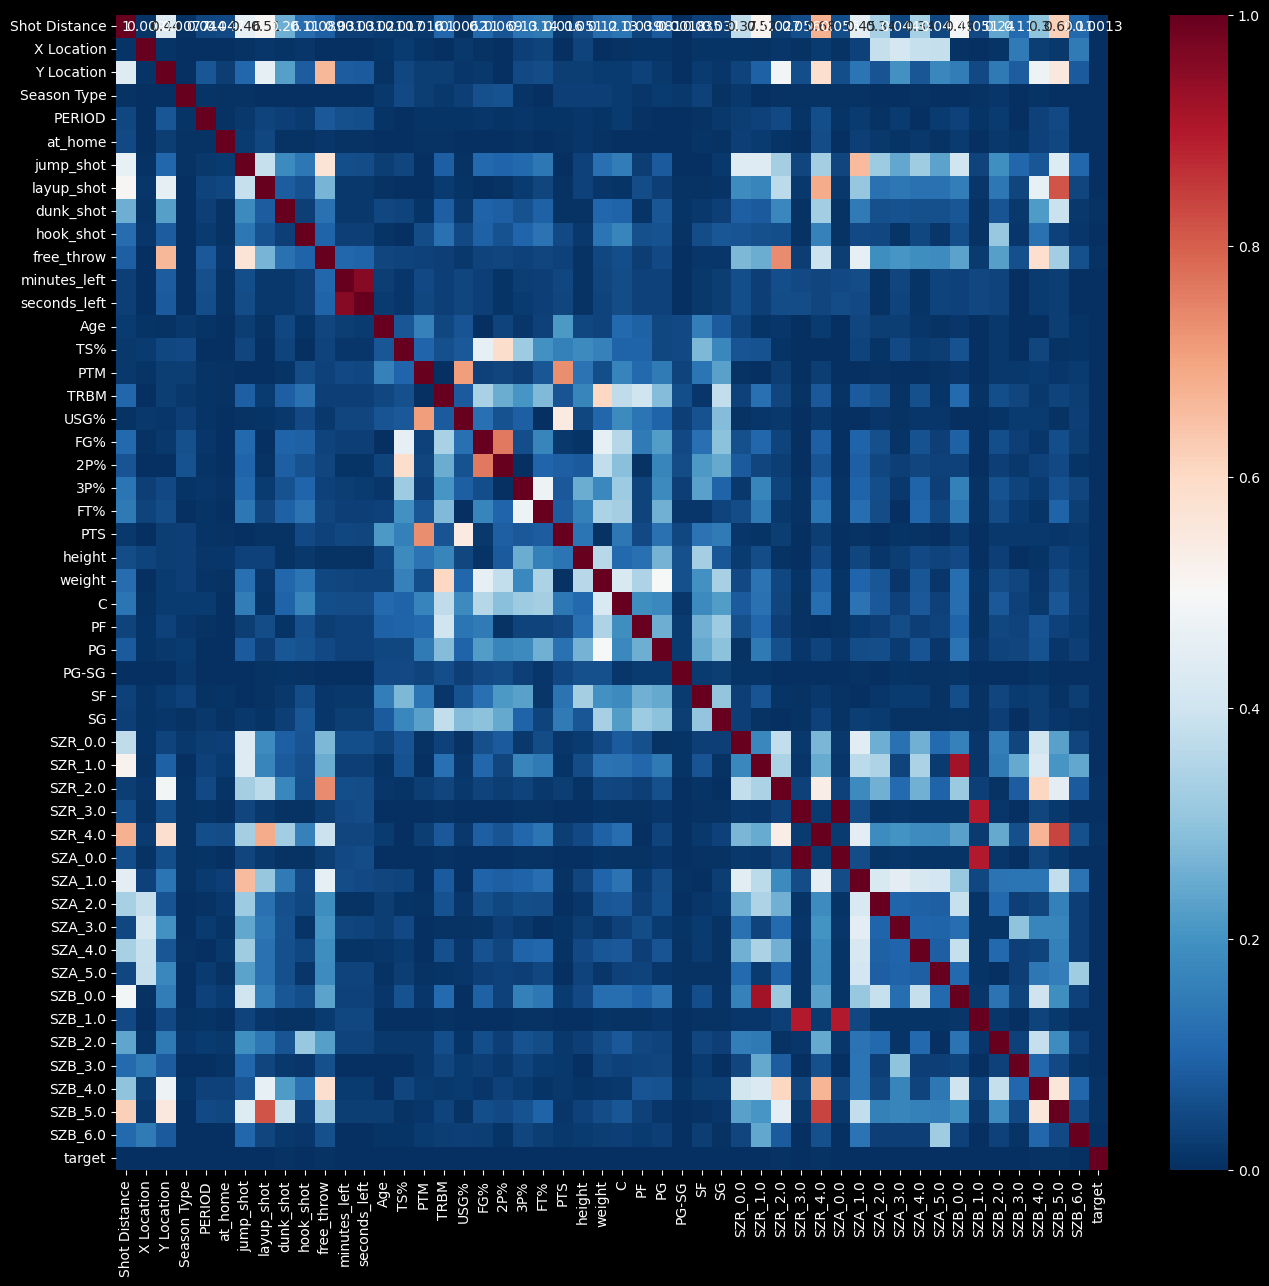

In [63]:
plt.figure(figsize=(16, 15))

sns.heatmap(df_scaled.corr('kendall').abs(), annot=True, cmap='RdBu_r', vmax=1, vmin=0);

In [66]:
# réduction de dimensions
sel_k_best = SelectKBest(f_classif, k=20)
sel_k_best.fit(X_train_scaled, y_train)

SelectKBest(k=20)

In [67]:
kbst = pd.DataFrame(sel_k_best.get_support(), index=X_train.columns)
kbst["score"]=sel_k_best.scores_
kbst.sort_values("score", ascending=False)

,0,score
jump_shot,True,42081.323296
free_throw,True,29330.371362
SZA_1.0,True,20488.389856
Y Location,True,11812.328225
SZR_2.0,True,10700.934014
SZR_1.0,True,8701.826457
dunk_shot,True,8181.846761
SZB_0.0,True,7698.578611
SZR_0.0,True,5610.759317
Shot Distance,True,5235.123244


,0
Shot Distance,6.051682e+00
X Location,4.734734e+00
Y Location,3.812074e+00
Season Type,3.266325e+00
PERIOD,2.929704e+00
at_home,2.589744e+00
jump_shot,2.209637e+00
layup_shot,2.018451e+00
dunk_shot,1.850138e+00
hook_shot,1.674250e+00


Composantes Principales retenues :  25


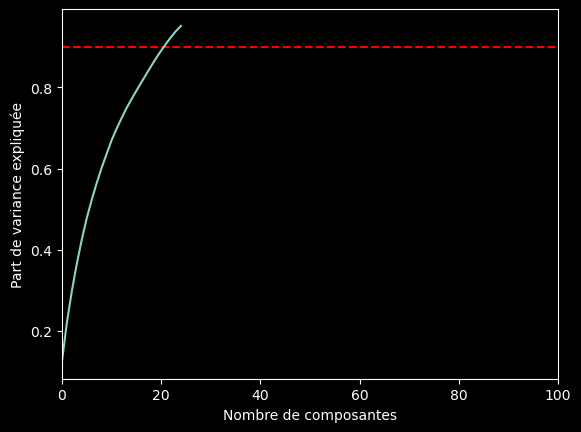

In [68]:
pca = PCA()
pca.fit(X_train_scaled)

display(pd.DataFrame(pca.explained_variance_, index=X_train.columns).sort_values(by=0, ascending=False))

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Composantes Principales retenues : ", pca.n_components_)

plt.figure()
plt.xlim(0,100)
plt.xlabel('Nombre de composantes')
plt.ylabel('Part de variance expliquée')
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

In [69]:
clf = RandomForestClassifier(n_jobs = -1)
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

0.6200235488872567

## XGBoost

In [70]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=.1, objective='binary:logistic')

xgb.fit(X_train_pca, y_train)

y_pred = xgb.predict(X_test_pca)
print('Accuracy with XGBoost:', accuracy_score(y_test, y_pred))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Accuracy with XGBoost: 0.6604530246330687


Classe prédite,0,1
Classe réelle,,
0.0,25242,12397
1.0,16729,31411


## KNN Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
cv = KFold(3)

params = {
    'n_neighbors':[1, 10, 50]
}

grid = GridSearchCV(knn, params, cv=cv)
grid.fit(X_train_pca, y_train)

print(grid.best_params_)

{'n_neighbors': 50}


In [15]:

y_pred_knn = grid.best_estimator_.predict(X_test_pca)
print('Accuracy with KNN:', accuracy_score(y_test, y_pred_knn))

print(grid.best_score_)

Accuracy with KNN: 0.6591823173504004
0.6619568480354868


In [16]:
y_pred_train_knn = grid.best_estimator_.predict(X_train_pca)
print('Train accuracy with KNN:', accuracy_score(y_train, y_pred_train_knn))

Train accuracy with KNN: 0.6826701407408055


## Voting Classifier

In [137]:
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


clf1 = KNeighborsClassifier(n_neighbors = 3)
clf2 = RandomForestClassifier(random_state = 123)
clf3 = LogisticRegression(max_iter = 1000)
clf4 = SVC(C=.1)

vclf = VotingClassifier(estimators = [('knn', clf1), ('rf', clf2), ('lr', clf3), ('svc', clf4)], voting = 'hard')


params = {'knn__n_neighbors': [5, 9],
          'rf__n_estimators': [20, 100, 200],
          'svm__C': [0.01, 0.1, 1],
        'estimators': [[('knn', clf1), ('rf', clf2), ('lr', clf3), ('svm', clf4)]] 
          }

grid = GridSearchCV(estimator=vclf, param_grid=params, cv=5)
grid = grid.fit(X_train, y_train)
print(grid.best_params_)

c:\Users\Sarah\anaconda3\envs\nba_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Sarah\anaconda3\envs\nba_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log